 # Lecture8 : Posterior Inference & Prediction
 
 ## Instructor: Dr. Hu Chuan-Peng 

**使用后验分布进行统计推断**

▶我们对贝叶斯分析中的概念、基本流程都已经有了大致的了解。我们知道通过结合先验与似然来得到后验，但更具体的后验能告诉我们什么呢？

⭐这节课我们关注怎么利用后验分布进行统计推断，包括：
> * 后验估计
> * 假设检验
> * 后验预测

我们主要使用一个睡眠情况调查的例子来介绍这三部分内容

<table>
        <tr>
            <td><img src="https://webstockreview.net/images/clipart-sleeping-clip-art-child-2.png" alt="" width="400" height="400"></td>
        </tr>
</table>


**睡眠状况调查**

假设我们想知道大学生11点前入睡的可能性是多少，我们把这一可能性记为$\pi$，并就这一问题开展了调查。

> 我们可以试着使用贝叶斯分析来回答这个问题

1. 首先，我们需要确立先验。在开始调查之前，我们对这个入睡可能性有着某种信念，假设我们认为$\pi$服从
$$
\pi  \sim \text{Beta}(4, 6) 
$$

2. 接下来我们开始收集数据，假设对**100**位大学生展开调查，其中有**14**个人回答他们在11点前入睡

    * 我们的数据可以用二项分布来描述
$$
Y | \pi  \sim \text{Bin}(100, \pi)
$$

> 这是我们熟悉的Beta-Binomial模型：
>$$\pi \sim \text{Beta}(\alpha, \beta)$$
>$$Y | \pi  \sim \text{Bin}(n, \pi) $$
>$$ \pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y)$$


3. 最后，后验可以写成：
$$
\pi | (Y = 14) \sim Beta(18, 92)
$$

**在贝叶斯的框架下，我们可以把后验分布看作是对$\pi$的一种估计，即当前数据更可能在哪一种$\pi$下出现。**

> 🤔当你看到这个后验分布时，你觉得它描述了关于$\pi$怎样的一种信息呢？
> * a. 在11点前入睡的学生比例大概是16%
> * b. 在11点前入睡的学生比例最有可能是16%，但这个比例也可能是9%到26%中的某一个。

![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/art-post-ch8-1.png)

## Posterior estimation

> b是更符合贝叶斯取向的回答，为什么这么说呢 ➡

* 我们来考虑另一种调查情况下得出的后验分布：

* 我们对$\pi$的先验仍然为$\pi \sim Beta(4, 6)$，但我们只调查了10位学生，在他们之中，回答自己在11点前入睡的人数为0

$$\pi \sim Beta(4, 6)$$
$$Y | \pi  \sim \text{Bin}(100, \pi)$$
$$\pi | (y = 0) \sim \text{Beta}(\alpha + y, \beta + n - y)$$

* 这种情况下，$\pi$的后验分布满足$\pi | (Y = 0) \sim Beta(4, 16)$

下图展示了这两种情况下的后验分布

> 黑线表示众数，即在后验分布中最可能出现的值

![Image Name](https://cdn.kesci.com/upload/s366vtdj8a.png?imageView2/0/w/960/h/960)

* 在这两种分布下，$\pi$最可能的取值都在16-17%左右

* 如果只关注众数，两种截然不同的情况却会导致相似的结论❌

* 但很明显，我们可以看到两图中$\pi$的分布范围是不同的


⭐**为了同时了解$\pi$的集中趋势和离散趋势，我们可以使用 *95%的可信区间(credible interval)* 来描述$\pi$**

### 可信区间(credible interval)

* 后验分布的2.5%百分位数和97.5%百分位数包含的区域共同组成了95%的后验可信区间

* 可信区间表示了参数出现在这个区域的概率
    * 比如，Beta(18,92) 95%的可信区间为(0.1,0.24)，则我们可以说，大学生在11点前入睡的可能性落在(0.1,0.24)的可能性是95%
    * 一种理解是，有95%的人认为大学生在11点前入睡的可能性很低，大概为 0.1~0.24

![Image Name](https://cdn.kesci.com/upload/s3676yx2sr.png?imageView2/0/w/960/h/960)



* 在创建可信区间时，95%是最常见的选项，但并不是唯一的选项，仍以Beta(18,92)为例，我们也可以创建其他可信区间，比如：
    * 50% 可信区间：由25%百分位数和75%百分位数包含的区域
    * 99%可信区间：由0.5%百分位数和99.5%百分位数包含的区域

![Image Name](https://cdn.kesci.com/upload/s36j8gacj.png?imageView2/0/w/960/h/960)

> 在95%CI的图中，由于后验分布是一个偏态分布，可以看到相较于前半部分，后半部分包含的值对应的概率更低。
> 当后验分布是偏态分布时，有时我们不以中位数为中心构建95%的可信区间，而是基于最高后验概率密度(众数)。



**最大后验概率密度区间(the highest density interval, HDI)**

最大概率密度区间HDI与中心区间是非常接近的。但是当后验分布为非正态分布时，两者存在区别，比如：


![Image Name](https://cdn.kesci.com/upload/image/rjdef48vqj.png?imageView2/0/w/640/h/640)

- 此时，后验中心区间从中位数的两侧开始展开。
- 而最大概率密度区间HDI从y轴最高的两处开始展开。

直觉理解：想象有一根水平的线从后验概率密度最高点往下滑，如果是95%HDI，则意味着黄色部分的面积占曲线下面积的95%

![Image Name](https://cdn.kesci.com/upload/s37y41n2yf.png?imageView2/0/w/640/h/640)

> source: https://mathematica.stackexchange.com/questions/173282/computing-credible-region-highest-posterior-density-from-empirical-distributio

> 将95%CI 与 95%HDI 进行比较：

![Image Name](https://cdn.kesci.com/upload/s36vflrg1f.png?imageView2/0/w/960/h/960) 

此外，非正态分布后验的平均值，中位数和众数并不相等。

- 其中众数为分布最高点对应的参数值
- 中位数左右两侧分布的面积各占50%
- 平均值的位置接近中位数，并且它容易分布形态的影响

![Image Name](https://cdn.kesci.com/upload/image/rjddhc2wo.png?imageView2/0/w/500/h/500)

> source: book--A Student’s Guide to Bayesian Statistics

## Posterior hypothesis testing

>🤔假设我们在一篇报道中看到这样一种描述：在11点入睡的大学生少于20%
> 根据这个结论，我们可以对后验分布做出怎样的假设？

比如，我们可以认为，在后验分布$Beta(18,92)$中，绝大多数$\pi$的取值都小于0.2

* 那么，我们可以考虑在后验分布$Beta(18,92)$中，$\pi$小于0.2的概率
$$
P(\pi < 0.2 \; | \; Y = 14) = \int_{0}^{0.2}f(\pi | y=14)d\pi .
$$
(如图，可以理解为$\pi$从0~0.2围成的曲线下面积)

![Image Name](https://cdn.kesci.com/upload/s36xa3xxpj.png?imageView2/0/w/960/h/960)

经计算可知，在$Beta(18, 92)$中，$\pi$小于0.2的概率是89.4%

### 假设检验

如果我们把这个问题放到假设检验的框架下，那么这个问题可以写成：

* 虚无假设：在11点前入睡的大学生比例大于等于20%

* 备择假设：在11点前入睡的大学生比例小于20%


$$
\begin{split}
H_0: & \; \; \pi \ge 0.2 \\
H_a: & \; \; \pi < 0.2 \\
\end{split}
$$

> 注意：这是一个单侧检验

我们可以计算出这两个假设对应的后验概率：

* 备择假设：$\pi < 0.2$
$$P(H_a \; | \; Y=14) = 0.849$$

* 虚无假设：$\pi \ge 0.2$
$$P(H_0 \; | \; Y=14) = 1-P(H_a \; | \; Y=14) = 0.151$$

将这二者相除，我们可以知道备择假设发生的可能性大约是虚无假设的6倍，这被称为**后验概率比(posterior odds)**

$$
\text{posterior odds } = \frac{P(H_a \; | \; Y=14)}{P(H_0 \; | \; Y=14)} \approx 5.62.
$$


我们说$\pi$的后验概率体现了对$\pi$的信念更新，那么我们可以看一下在**先验分布**中，虚无假设和备择假设发生的可能性

* 备择假设：$\pi < 0.2$
$$
P(H_a) = \int_0^{0.2} f(\pi) d\pi \approx 0.0856 
$$

* 虚无假设：$\pi \ge 0.2$
$$
P(H_0) = 1-P(H_a) \approx 0.914
$$

* 先验概率比：
$$
\text{Prior odds } = \frac{P(H_a)}{P(H_0)} \approx 0.093 
$$

### 贝叶斯因子(Bayes Factor, BF)

> $$\text{posterior odds } \approx 5.62$$
> $$\text{Prior odds } \approx 0.093 $$

从先验到后验，备择假设发生的相对可能性发生了改变。

更进一步地，我们可以使用**贝叶斯因子**来比较后验概率比和先验概率比

$$
\text{Bayes Factor} = \frac{\text{posterior odds }}{\text{prior odds }} = \frac{\text{后验概率比}}{\text{先验概率比}}
$$

代入我们的数据中
$$
\text{Bayes Factor} = \frac{5.62}{0.093} \approx 60
$$

* 在这个例子中，贝叶斯因子大约是60，表明备择假设在后验分布出现的可能性大于在先验分布出现的可能性



我们对贝叶斯因子进行一个总结：

$$
\text{Bayes Factor}
= \frac{\text{posterior odds}}{\text{prior odds}}
= \frac{P(H_a | Y) / P(H_0 | Y)}{P(H_a) / P(H_0)}
$$

* BF=1，收集到的数据并没有改变备择假设$H_a$的相对可能性
* BF>1，收集到的数据增加了备择假设$H_a$的相对可能性。BF越大，表明支持备择假设$H_a$的证据越强
* BF<1，收集到的数据削弱了备择假设$H_a$的相对可能性。BF越小，表明支持备择假设$H_a$的证据越弱

|**贝叶斯因子** |**解释标准**|
|-|-|
|> 100|极强的证据支持*H0*|
|30 ~ 100|非常强的证据支持*H0*|
|10 ~ 30|较强的证据支持*H0*|
|3 ~ 10|中等程度的证据支持*H0*|
|1 ~ 3|较弱的证据支持*H0*|
|1|没有证据|
|1/3 ~ 1|较弱的证据支持*H1*|
|1/10 ~ 1/3|中等程度的证据支持*H1*|
|1/30 ~ 1/10|较强的证据支持*H1*|
|1/100 ~ 1/30|非常强的证据支持*H1*|
|< 1/100|极强的证据支持*H1*|

> source: 该表改编自胡传鹏等，（2018），源引用于(Lee & Wagenmakers, 2014)。

综上，后验概率(0.85)和贝叶斯因子(60)为备择假设提供了相当可信(fairly convincing)的证据。

* 这区分于我们曾经在频率主义框架下所做的那样：根据p值的大小拒绝或接受假设。

* 在贝叶斯学派中，并没有一个类似的一刀切标准，可以告诉我们后验概率或贝叶斯因子要达到什么标准才能将一个假设判断为真或假。它只是衡量不同的假设发生的相对可能性。

**额外补充：双侧检验**

* 除了单侧检验，有时我们的问题需要用双侧检验来回答。

* 比如，或许我们想知道 11点前入睡的大学生比例是否为30%，此时备择假设和虚无假设可以写成：
$$
\begin{split}
H_0: & \; \; \pi = 0.3 \\
H_a: & \; \; \pi \ne 0.3 \\
\end{split}
$$

* 但此时我们会遇到一个问题，因为$\pi$的后验分布是连续的，我们知道对于连续型变量，单个值发生的概率为0(一条线)：
$$
P(\pi = 0.3 | Y = 14) = \int_{0.3}^{0.3} f(\pi | y = 14)d\pi = 0
$$

* 那么备择假设发生的概率为：
$$
P(\pi \ne 0.3 | Y = 14) = 1 - P(\pi = 0.3 | Y = 14) = 1
$$

* 此时如果我们仍然沿用刚刚的公式计算后验概率比：
$$
\text{Posterior odds } = \frac{P(H_a \; | \; Y=14)}{P(H_0 \; | \; Y=14)} = \frac{1}{0} = \text{ nooooo!}
$$

* 既然在连续型变量中，考虑单个值的概率会遇到计算上的问题，我们可以引入**区间**，比如11点前入睡的大学生比例$\pi$是否在(0.25,0.35)这个区间内：

$$
\begin{split}
H_0: & \; \; \pi \in (0.25, 0.35) \\
H_a: & \; \; \pi \notin (0.25, 0.35) \\
\end{split}
$$

> 注：区间的选择需要结合可信区间来决定

*具体的计算步骤和单侧检验情况下一样，在这里不再展开*

## Posterior prediction

### 后验预测分布中的变异

在得到后验分布后，除了后验估计、假设检验之外，常见的统计推断还有后验预测。

> 后验预测：根据当前后验得出的对$\pi$的估计，我们**预测**如果再收集20人的数据，在这新的20人中 11点之前入睡的人数是多少？

**注意**，在使用后验分布进行预测时，存在着两种变异：

1. 参数变异(**Posterior variability** in π)

    * 后验分布直观地体现了这一变异，它表现了不同π取值的相对可能性。

        * 比如在后验分布 $Beta(18,92)$ 中，π最可能的取值大约是0.16，但0.16并不是唯一的可能取值

2. 采样变异(**Sampling variability** in the data)

    * 样本的抽取具有随机性

> 我们用公式来具体说明采样变异性：

* 在新数据中，我们把可能出现的结果写为$Y' = y'$，$y'$可以为$\{0,1,...,20\}$中的任意一个数

* 在任意$\pi$下，某种结果$y'$出现的可能性可以表示为:

$$
f(y'|\pi) = P(Y' = y' | \pi) = \binom{20}{ y'} \pi^{y'}(1-\pi)^{20 - y'}
$$

* 随意选取三种不同的$\pi$，画出每一种结果的可能性

![Image Name](https://cdn.kesci.com/upload/s36z989r7y.png?imageView2/0/w/960/h/960)

* 在每一个给定的$\pi$下，都有不同的结果可能发生，反映了抽样过程中存在的变异性
    * 比如，当$\pi=0.16$时，在当前样本中，最有可能出现的结果是有4人回答自己在11点前入睡，但由于抽样变异性，也有可能回答自己在11点前入睡的人数为0。

### 后验预测分布

在当前例子下，我们感兴趣的是特定$y'$发生的可能性，那么我们既要考虑到给定$\pi$下$y'$的变异性，也要考虑到$\pi$取值的变异性:
$$
f(y'|\pi) f(\pi|y=14)  
\tag{1}
$$

* 遍历所有的$\pi$，计算公式(1)的总和并进行平均，我们就可以获得$Y' = y'$发生的整体概率，得到了$Y'$的后验预测模型(**posterior predictive model** )

$$
f(y'|y=14) = P(Y'=y' \; | \; Y=y) = \int_0^1 f(y'|\pi) f(\pi|y=14) d\pi 
$$

* 有了后验预测模型之后，我们回到最开始的问题，比如我们想知道，在这20人中，有$\ge 5$人给出肯定回答的概率是多少？

    * 我们可以进行如下计算：

$$
\begin{split}
P(Y' \ge 5 | y = 14) 
& = \sum_{y' = 5}^{20} f(y' | y = 14) \\
& = f(y' = 5 | y = 14) + f(y' = 6 | y = 14) + \cdots + f(y' = 20 | y = 14)\\
& = 0.233. \\
\end{split}
$$

* 我们也可以计算后验预测分布的期望值：将$\pi$与对应的后验预测值相乘并加和：

$$
\begin{split}
E(Y' | y = 14) 
& = \sum_{y' = 0}^{20} y' f(y' | y = 14) \\
& = 0\cdot f(y' = 0 | y = 14) + 1 \cdot f(y' = 1 | y = 14) + \cdots + 20\cdot f(y' = 20 | y = 14)\\
& = 3.273. \\
\end{split}
$$

**代码练习**

后验预测分布如图所示，我们尝试使用代码来生成验预测分布

![Image Name](https://cdn.kesci.com/upload/s36z9nlnbb.png?imageView2/0/w/960/h/960)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


# 定义绘图函数
def plot_pp(y_num, pp_sum):
    plt.stem(y_num,pp_sum,                      #横轴为可能的结果，纵轴为结果对应的可能性
            linefmt='black',
            bottom=-1)

    plt.xlabel("y'",fontsize=15)
    plt.xticks(np.arange(0, 21,5))
    plt.ylabel("f(y'|y=14)",
            fontsize=15)
    plt.ylim(0, 0.25)
    plt.yticks(np.arange(0, 0.21,0.05))
    sns.despine()

In [ ]:
def posterior_prediction_model(pi_i):
  y_num = np.linspace(0,20,21)            #在0-20之间生成21种可能出现的结果
  posterior = st.beta.pdf(pi_i,18,92)        #计算每一个pi对应的后验分布概率值
  likelihood = st.binom.pmf(y_num,20,pi_i)   #计算每一个pi下，不同y出现的可能性，一共有20个值
  #===========================================================================
  #          如何根据**后验分布**和**似然函数**计算后验预测模型
  #                 请修改...中的值
  #===========================================================================
  pos_predict = ...

  return pos_predict

#===========================================================================
#      请修改参数 pi_i 的...值
#      输出结果的含义：在给定参数下，21个数据(对应0到20人相信学生在11点前睡)的可能性
#===========================================================================
posterior_prediction_model(pi_i = ...)

In [ ]:
# 计算在所有参数 pi 可能条件下不同的后验预测模型
pi = np.linspace(0,1,101)                   #在0-1之间生成101个pi值
pp_list = []                                #创建一个空的列表，用来存储每一个pi下，不同y出现的可能性
for pi_i in pi:                                #遍历pi
    pos_predict = posterior_prediction_model(pi_i)
    pp_list.append(pos_predict)             #存入空列表中

pp_list = np.array(pp_list)                 #转换为numpy数组

# 查看后验预测模型
# 每一行代表参数pi在0-1之间生成的101个值
# 每一列代表21种可能出现的结果y'
pd.DataFrame(pp_list)

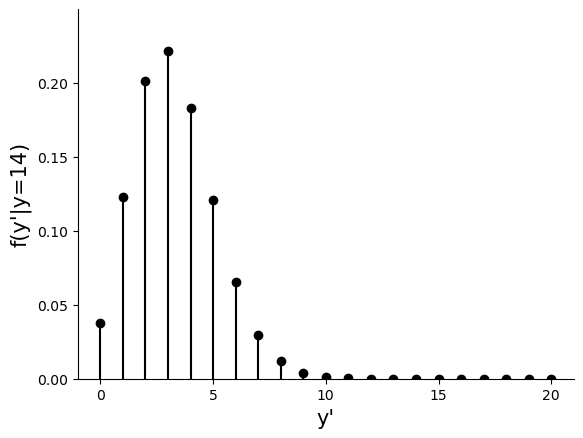

In [10]:
# 归一化后绘图
pp_sum = np.sum(pp_list,axis=0)             #对所有pi下，不同y出现的可能性进行求和，axis=0表示按行对每一列进行求和
pp_sum /= np.sum(pp_sum)                    #平均

plot_pp(y_num, pp_sum)

## Posterior analysis with MCMC

在之前例子中我们接触了如何通过后验分布进行后验估计、统计推断、假设检验和后验预测。

现在，我们进入实战的环节。结合之前学习 MCMC 和 PyMC 的内容，来进行对后验分布的分析。

### 定义和拟合模型

首先，定义 PyMC 模型。借用之前的例子：
- 先定义一个变量 pi，代表学生相信学生在11点前睡的概率。我们假设 pi 服从 Beta 分布，alpha=4, beta=6
- 假设数据 y = 14，代表100名学生中有14名在11点前睡觉

In [27]:
# 导入 pymc 模型包，和 arviz 等分析工具 
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# STEP 1: 定义模型
with pm.Model() as model:
    pi = pm.Beta('pi', alpha=4, beta=6)               # 变量 pi，代表学生相信学生在11点前睡的概率， 服从 Beta 分布
    Y = pm.Binomial('Y', n=100, p=pi, observed=14)    # 数据 y = 14，代表100名学生中有14名在11点前睡觉

接着，我们通过 MCMC 采样，来对后验分布进行采样。
- 我们设置 4 条采样链。
- 采样 5500 个样本，tune 500 个样本。
- 总共 4 * 5000 = 20000 个样本。

In [13]:
# STEP 2: MCMC采样
with model:
    trace = pm.sample(
        chains=4,               # 设置 4 条采样链
        draws=5000, tune=500,   # 采样 5000 个样本，tune 500 个样本
        random_seed=84735)      # 设置随机数，以便得到相同的结果

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Sampling 4 chains for 500 tune and 5_000 draw iterations (2_000 + 20_000 draws total) took 34 seconds.
d:\01Redirect\04miniconda\envs\pymc5_3.11\Lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


### 模型诊断

然后，我们对模型进行可视化和诊断。

d:\01Redirect\04miniconda\envs\pymc5_3.11\Lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'pi'}>, <Axes: title={'center': 'pi'}>]],
      dtype=object)

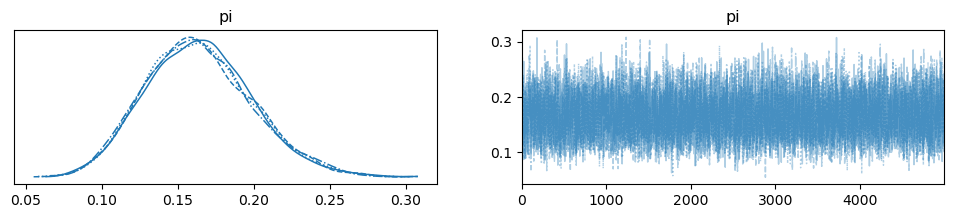

In [17]:
az.plot_trace(trace)

- 图左：四条链的后验密度分布保持一致
- 图右：轨迹图展现了MCMC链的随机性和独立性

<Axes: title={'center': 'pi'}>

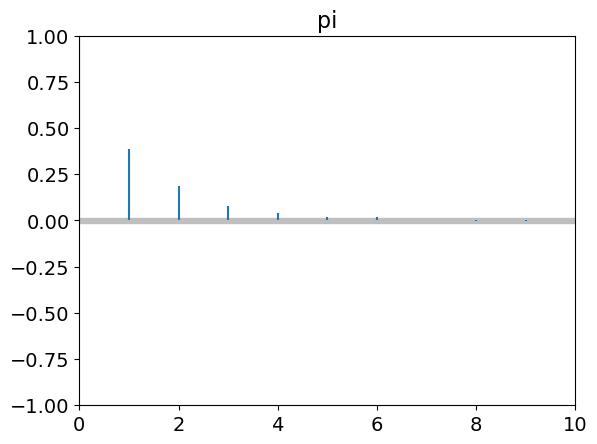

In [21]:
az.plot_autocorr(trace, max_lag=10, combined=True)

自相关图：链表现得 "足够 "像一个独立样本

In [22]:
az.summary(trace, kind = "diagnostics")

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
pi,0.0,0.0,8007.0,12719.0,1.0


诊断指标显示：
- Rhat 接近 1，都表明模型非常稳定  
- ess_bulk = 20,000 个采样中有 8007 个独立样本，占 40%

### 后验估计和假设检验

C:\Users\Epool\AppData\Local\Temp\ipykernel_24228\2089979640.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trace.posterior['pi'], bins=20, label="mcmc")


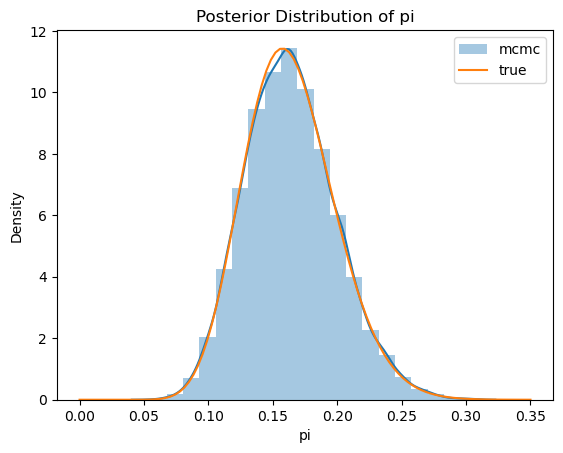

In [36]:
# 绘制
sns.distplot(trace.posterior['pi'], bins=20, label="mcmc")

x = np.linspace(0, 0.35, 100)
y = st.beta.pdf(x, 18, 92)
plt.plot(x, y, label="true")

plt.legend()
plt.xlabel('pi')
plt.ylabel('Density')
plt.title('Posterior Distribution of pi')
plt.show()

完整的 MCMC 近似值（橙色）与实际后验模型（蓝色）非常接近。

我们可以进一步查看后验分布的均值和置信区间。
- hdi_2.5% 和 hdi_97.5% 报告了MCMC链值的 2.5 和 97.5 百分位数，构成了 95% 的可信区间

In [39]:
# 后验分布的均值和置信区间
az.summary(trace, kind = "stats", hdi_prob = 0.95)

,mean,sd,hdi_2.5%,hdi_97.5%
pi,0.164,0.035,0.096,0.233


In [41]:
true_posterior = st.beta(18,92)
lower_bound, upper_bound = true_posterior.interval(0.95)
mean = true_posterior.mean()
print(f"mean:", mean)
print(f"95% Lower bound:", lower_bound)
print(f"95% Upper bound:", upper_bound)

mean: 0.16363636363636364
95% Lower bound: 0.10090843809723256
95% Upper bound: 0.23792856204222332


回到最初的问题，我们可以进一步检验：在11点前入睡的大学生比例是否大于等于20%，即
* 虚无假设：在11点前入睡的大学生比例大于等于20%
* 备择假设：在11点前入睡的大学生比例小于20%

In [46]:
proportion  = (trace.posterior['pi'] > 0.2).mean().values
print(f"虚无假设：在11点前入睡的大学生比例超过20%的概率: {proportion:.3f}")
print(f"备择假设：在11点前入睡的大学生比例低于20%的概率: {1-proportion:.3f}")

虚无假设：在11点前入睡的大学生比例超过20%的概率: 0.154
备择假设：在11点前入睡的大学生比例低于20%的概率: 0.846


根据**后验概率比(posterior odds)**： 

$$
\text{posterior odds } = \frac{P(H_a \; | \; Y=14)}{P(H_0 \; | \; Y=14)} \approx 5.62.
$$

择假设发生的可能性大约是虚无假设的5.5倍

In [54]:
posterior_odds = (1-proportion)/ proportion
print(f"后验概率比: {posterior_odds:.3f}")

后验概率比: 5.479


我们可以通过贝叶斯因子来进一步验证这个假设。

$$
\text{Bayes Factor} = \frac{\text{posterior odds }}{\text{prior odds }} = \frac{\text{后验概率比}}{\text{先验概率比}}
$$

In [58]:
# Define the prior distribution
prior_alpha = 4
prior_beta = 6
prior_dist = st.beta(prior_alpha, prior_beta)

prior_odds = prior_dist.cdf(0.2)

# Compute the Bayes factor
bayes_factor = posterior_odds/prior_odds

print(f"Bayes Factor:{bayes_factor:.3f}")

Bayes Factor:63.973


### 后验预测

最后，我们可以利用马尔可夫链值来近似计算后验预测模型 Y′
- 我们假设新收集的 20 位学生的数据中，有 Y’ 人在11点前睡觉。

🤔回顾一下，后验预测模型反映了两个变异性来源： 
  - 后验参数的变异 
  - 参数生成数据的变异

然而我们不必如练习时自己生成后验预测，因为 pymc 提供了直接获取后验预测的方法：

In [74]:
with model: 
    posterior_pred = pm.sample_posterior_predictive(trace, var_names=['Y'])

# 查看结果
posterior_pred

Sampling: [Y]


Inference data with groups:
	> posterior_predictive
	> observed_data

返回的 `posterior_pred` 包含之前的观测数据 `observed_data`，以及预测的数据 `posterior_predictive`。

我们可以进一步观察预测结果，并进行绘图。

In [75]:
observed_data = posterior_pred.observed_data['Y']
posterior_pred = posterior_pred.posterior_predictive.to_dataframe()
posterior_pred

Y
chain draw    
0     0     16
      1     18
      2     28
      3     17
      4     13
...         ..
3     4995  17
      4996  15
      4997  17
      4998  10
      4999  11

[20000 rows x 1 columns]

可以看到，对于每一个参数采样，都生成了一个对应的后验预测值 Y。

我们可以进一步进行绘图：

Text(0, 0.5, 'Density')

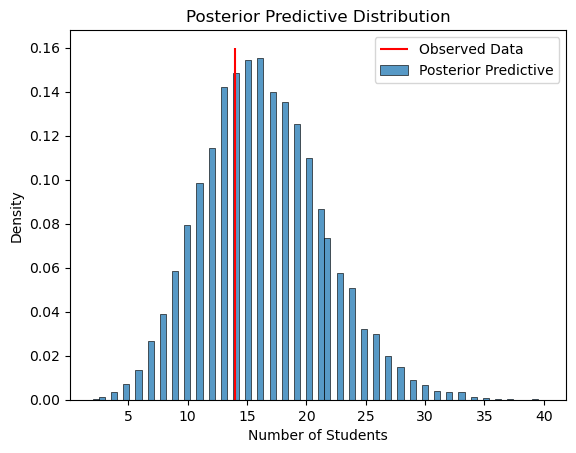

In [80]:
sns.histplot(posterior_pred['Y'], stat='density', color='C0', label ='Posterior Predictive')
plt.vlines(observed_data, 0, 0.16, color='r', label='Observed Data')

plt.legend()
plt.title('Posterior Predictive Distribution')
plt.xlabel('Number of Students')
plt.ylabel('Density')

## Summary and discussion

本节课我们学习了如何利用精确或近似的后验模型，对未知参数进行统计分析，包括：
1. 后验预测(均值和可信区间)
2. 基于后验的假设检验
3. 后验预测

😎到这里你或许发现了贝叶斯的独特支出，相比于之前学习的基于频率学派(frequentists)的统计方法。

贝叶斯分析结果的易解释性 -- 样本和总体的关系

- 贝叶斯分析根据观察到的数据 Y 来评估未知参数 π 的不确定性。
    
    - 例如，在 100 名学生中，有 14 名学生在11点前睡觉
    - 根据这一观察结果，我们确定在11点前睡觉的学生比例 π 低于 0.20 的后验概率为 84.9%
        
- 在频数分析中，往往根据对于总体性质π的假定值来评估观测样本Y的不确定性。
    
    - 频率学派假设只要无限(long-run)的进行抽样，样本分布的参数就会近似总体分布。 
    - 然后，根据零假设显著性检验(Null Hypothesis Significance Testing)和 p 值来判断样本和总体的关系。
    - 例如，频率学派假设 π 为 0.20时，我们观察到的样本(100 名学生)中，最多只有 Y = 14 (8%) 的学生在11点前睡觉。
        

假设检验的哲学基础是波普尔的科学可证伪性
  - 它所回答的问题对人脑来说却**不那么自然**：因为我们实际上观察到了数据，但却不知道π，所以要解释一个假设相反的计算结果，可能会让人费解。 
  - 然而，在检验假设时，更自然的做法是问 "我的假设有多大可能性？(贝叶斯概率的答案），而不是 "如果我的假设不成立，我的数据的可能性有多大？(频繁概率的答案）。
  - 鉴于P值经常被曲解，进而被误用，整个频繁主义和贝叶斯理论都越来越不强调P值。

两个学派的差异对比

频率学派
* 统计推断依赖于参数的**抽样分布**，即只要无限(long-run)的进行抽样，样本分布的参数就会有某种分布形式；
* NHST中的$p$值和置信区间的解读均依赖于“无限次抽样”的预设；
* 实际操作中，我们往往只会收集一次数据，并不会反复的进行抽样；有些情境中，预设“无限次重复抽样并不合理；

贝叶斯学派
* 假定参数本身是分布，不确定性一起存在于推断之中；
* 直接根据数据对先验信念进行更新；

|                     | 频率学派   | 贝叶斯学派   |
| ------------------- | ---------- | ------------ |
| 世界真相 (参数) | 固定       | 变化         |
| 概率                | 抽样的噪音 | 信念         |
| 推断过程            | NHST       | 贝叶斯定理   |
| 数据                | 存在噪音   | 固定         |
| 推断可更新性        | 否         | 是           |
| 主观性              | 前提预设   | 通过先验设定 |
